In [75]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# from pandas_datareader import data as pdr
# Can be used for collecting other data. 

In [76]:
# Variables
EndPoint = dt.datetime(2023, 4, 16, 12, 18, 33) 
YearsToFetch = 5
StartPoint = 365 * YearsToFetch

In [ ]:
tickers = ["AAPL", "QQQ", "MSFT", "TSLA", "SPY"]
# tickers = ["SPY"]

In [78]:
EndDate = EndPoint
StartDate = EndDate - dt.timedelta(days=StartPoint)
EndDate, StartDate


(datetime.datetime(2023, 4, 16, 12, 18, 33),
 datetime.datetime(2018, 4, 17, 12, 18, 33))

In [79]:
df = yf.download(tickers, StartDate, EndDate, auto_adjust=False)
# auto_ajust to include ajd close.


[*********************100%***********************]  3 of 3 completed


In [ ]:
# df.head()
# df.xs(("TSLA"), axis=1, level=1).head()

In [81]:
AdjClosePrice = df["Adj Close"]
# df.head()

In [82]:
log_returns = np.log(AdjClosePrice / AdjClosePrice.shift(1))
# print(log_returns.xs(("TSLA"),axis=1))


In [83]:
cum_log_returns = log_returns.cumsum()
cum_log_returns.tail()

Ticker,MSFT,QQQ,SPY
Date,,,
2023-04-10,1.160566,0.683425,0.501305
2023-04-11,1.137636,0.676987,0.501573
2023-04-12,1.139967,0.668114,0.497489
2023-04-13,1.162120,0.687507,0.510684
2023-04-14,1.149272,0.685625,0.508239


<Axes: title={'center': 'Cumulative Ajd Close Returns'}, xlabel='Date'>

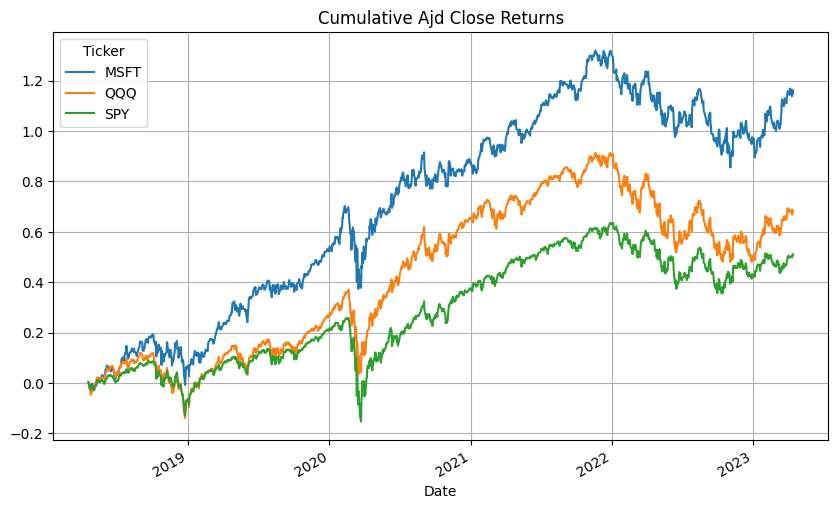

In [86]:
cum_log_returns.plot(figsize=(10,6), title="Cumulative Ajd Close Returns", grid=True)